In [1]:
!pip install tensorflow

import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Data/BodyPerformanceData.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


As most of the data is numerical, we can run describe() to check the distribution of data in every column

In [3]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [4]:
#check for null values
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
#Convert categorical data to numerical 
df['gender']=df['gender'].map({'M':0,'F':1})
#Convert class labels to numerical as well 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# df['class']=df['class'].map({"A":1,"B":2,"C":3,"D":4})
df['class']=le.fit_transform(df['class'])
class_dict=dict(zip(le.inverse_transform([0,1,2,3]),[0,1,2,3]))
df.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

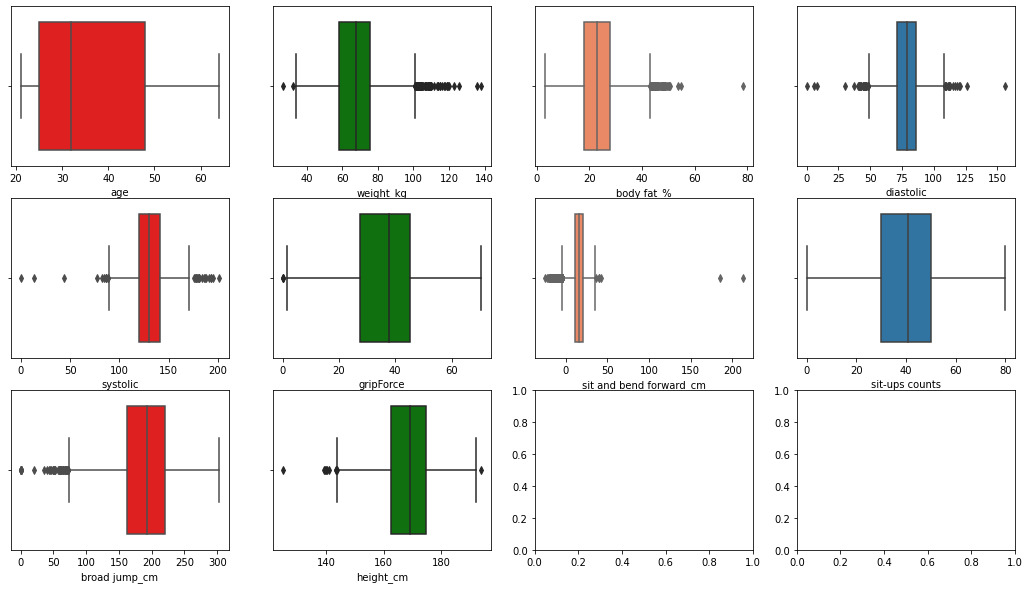

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
						
sns.boxplot(df['age'],ax=axes[0, 0],color="red")
sns.boxplot(df['weight_kg'],ax=axes[0, 1],color="green")
sns.boxplot(df['body fat_%'],ax=axes[0, 2],color="coral")
sns.boxplot(df['diastolic'],ax=axes[0, 3])
sns.boxplot(df['systolic'],ax=axes[1, 0],color="red")
sns.boxplot(df['gripForce'],ax=axes[1, 1],color="green")
sns.boxplot(df['sit and bend forward_cm'],ax=axes[1, 2],color="coral")
sns.boxplot(df['sit-ups counts'],ax=axes[1, 3])
sns.boxplot(df['broad jump_cm'],ax=axes[2, 0],color="red")
sns.boxplot(df['height_cm'],ax=axes[2, 1],color="green")

plt.show()

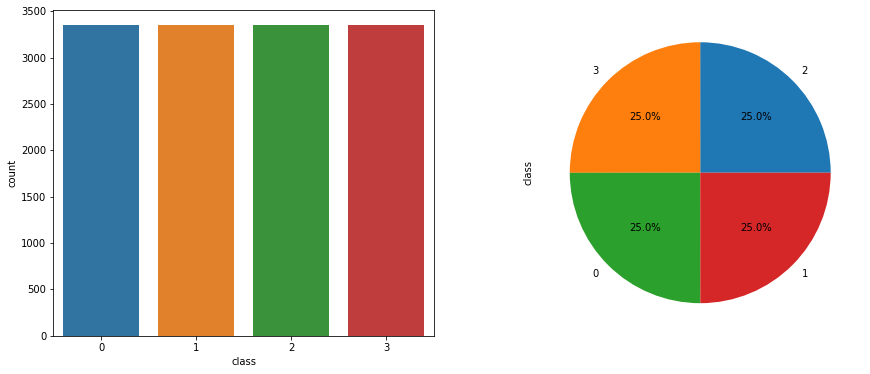

In [7]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='class', data=df, ax=ax[0])
_ = df['class'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

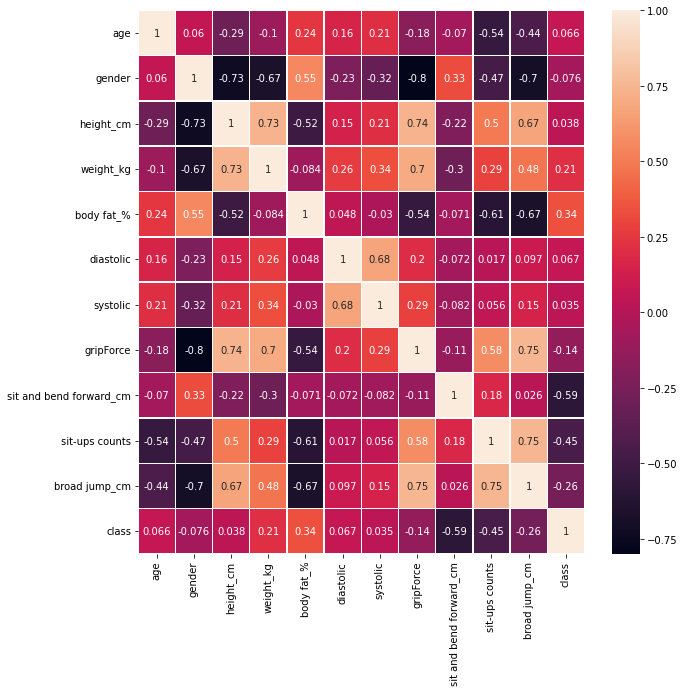

In [8]:
#To check multicollinearity of data 
glue=df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(glue, annot=True, linewidth=.5,ax=ax)
plt.show()

As we can see there is not more that |0.8| corr between differetn variables. Indicating that there isnt multicollinearity between data.

In [9]:
from sklearn.preprocessing import RobustScaler

scalable_cols=['age',	'height_cm',	'weight_kg',	'body fat_%',	'diastolic',	'systolic',
                'gripForce',	'sit and bend forward_cm',	'sit-ups counts',	'broad jump_cm']

rs=RobustScaler()
df[scalable_cols]=pd.DataFrame(rs.fit_transform(df[scalable_cols]),columns=scalable_cols)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,-0.217391,0,0.250000,0.458480,-0.15,0.066667,0.000000,0.960452,0.224490,0.95,0.406780,2
1,-0.304348,0,-0.338710,-0.678363,-0.71,-0.133333,-0.190476,-0.084746,0.010204,0.60,0.610169,0
2,-0.043478,0,0.838710,0.619883,-0.27,0.866667,1.047619,0.389831,-0.428571,0.40,-0.203390,2
3,0.000000,0,0.427419,0.216374,-0.44,-0.200000,0.809524,0.197740,-0.102041,0.60,0.440678,1
4,-0.173913,0,0.370968,0.017544,-0.57,-0.600000,-0.142857,0.316384,1.112245,0.20,0.406780,1


In [10]:
df.describe()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,0.207613,0.367804,-0.051628,0.002767,0.044016,-0.013544,0.011182,-0.052888,-0.101095,-0.061439,-0.048650,1.500187
std,0.592419,0.482226,0.679563,0.698811,0.725684,0.716136,0.700664,0.600275,0.862926,0.713835,0.675729,1.118109
min,-0.478261,0.000000,-3.564516,-2.403509,-1.980000,-5.266667,-6.190476,-2.141243,-4.204082,-2.050000,-3.271186,0.000000
25%,-0.304348,0.000000,-0.548387,-0.538012,-0.480000,-0.533333,-0.476190,-0.587571,-0.540816,-0.550000,-0.525424,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.695652,1.000000,0.451613,0.461988,0.520000,0.466667,0.523810,0.412429,0.459184,0.450000,0.474576,3.000000
max,1.391304,1.000000,1.983871,4.134503,5.560000,5.146667,3.380952,1.841808,20.081633,1.950000,1.864407,3.000000


In [11]:
from sklearn.decomposition import PCA
pca_cols=list(df.columns)
pca_cols.remove("class")
pca_cols
data=df[pca_cols]
pca = PCA(n_components=2, svd_solver='arpack')
pca_data=pca.fit_transform(data.values)


(13393, 2) (13393, 1)


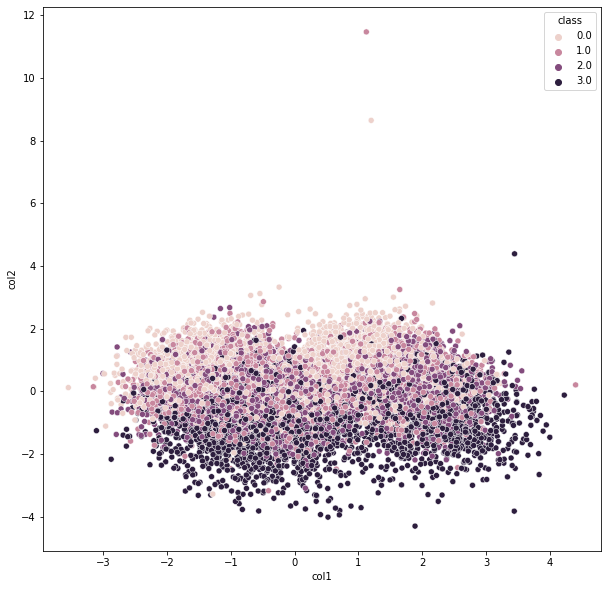

In [12]:
pca_data.reshape((-1,2))
df_class=df["class"].values
df_class=df_class.reshape((-1,1))
print(pca_data.shape,df_class.shape)
pca_data=np.hstack((pca_data,df_class))
pca_df=pd.DataFrame(pca_data,columns=['col1','col2','class'])
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=pca_df, x="col1", y="col2", hue="class",ax=ax)

The data doesnt seem to be clearly seperable but we can still see some pattern between different classes. 

In [13]:
#Let's try out some algorithms 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df[pca_cols],df["class"],shuffle=True,
                                               stratify=df["class"],train_size=0.8)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def get_model(model):
  if model=="LogisticRegression":
    return LogisticRegression(penalty='elasticnet',C=0.2,solver='saga',l1_ratio=0.2)
  if model=="RandomForest":
    return RandomForestClassifier(n_estimators=50,max_depth=5,min_samples_split=2,criterion = 'entropy')
  if model=="SVM":
    return SVC(C=1.0,kernel='poly')

def get_NNmodel(optimizer):
    weights=np.ones([11])
    init=tf.constant_initializer(weights)
    model = Sequential()
    model.add(Dense(11, input_shape=(11,), activation='relu', kernel_regularizer='l1'))
    model.add(Dropout(0.25))
    model.add(Dense(9, activation='relu', kernel_regularizer='l1'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])
    return model
    


def evaluate_model(cv,model):
	# get the dataset
	X, y = df[pca_cols],df["class"]
	# get the model
	model = get_model(model)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [35]:
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
evaluate_model(cv,"LogisticRegression")


(0.6180854502691917, 0.5977611940298507, 0.6392830470500374)

In [36]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# epochs = [10, 50, 100]
optimizer = ['Adam']
epochs = [50]
param_grid = dict(epochs=epochs, optimizer=optimizer)

Kmodel = KerasClassifier(build_fn=get_NNmodel, verbose=1)
grid = GridSearchCV(estimator=Kmodel, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='boolean',error_score='raise')
print(grid)
grid_result = grid.fit(x_train, y_train)

<ipython-input-36-e8441987a9ca>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Kmodel = KerasClassifier(build_fn=get_NNmodel, verbose=1)


GridSearchCV(error_score='raise',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff860a59d30>,
             n_jobs=-1, param_grid={'epochs': [50], 'optimizer': ['Adam']},
             refit='boolean', scoring='accuracy')


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
335/335 [==============================] - 1s 2ms/step - loss: 1.6448 - accuracy: 0.4582
Epoch 2/50
335/335 [==============================] - 1s 2ms/step - loss: 1.2892 - accuracy: 0.5400
Epoch 3/50
335/335 [==============================] - 1s 2ms/step - loss: 1.1769 - accuracy: 0.5629
Epoch 4/50
335/335 [==============================] - 1s 2ms/step - loss: 1.1367 - accuracy: 0.5691
Epoch 5/50
335/335 [==============================] - 1s 2ms/step - loss: 1.1217 - accuracy: 0.5761
Epoch 6/50
335/335 [==============================] - 1s 2ms/step - loss: 1.1063 - accuracy: 0.5867
Epoch 7/50
335/335 [==============================] - 1s 2ms/step - loss: 1.0944 - accuracy: 0.5889
Epoch 8/50
335/335 [==============================] - 1s 2ms/step - loss: 1.0871 - accuracy: 0.5945
Epoch 9/50
335/335 [==============================] - 1s 2ms/step - loss: 1.0801 - accuracy: 0.5933
Epoch 10/50
335/335 [==============================] - 1s 2ms/step - loss: 1.0690 - accuracy: 0.5968

In [30]:
grid_result

GridSearchCV(error_score='raise',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6c264212b0>,
             n_jobs=-1,
             param_grid={'epochs': [10, 50, 100],
                         'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                                       'Adam', 'Adamax', 'Nadam']},
             refit='boolean', scoring='accuracy')

In [28]:
# import torch 
# import torch.nn as nn

# class NeuralNets(nn.Module):

#   def __init__(self,input_dim,hidden_dim,output_dim):
#     super(NeuralNets, self).__init__()
#     self.fc1=nn.Linear(input_dim,hidden_dim)
#     self.dp1=nn.Dropout(0.2)
#     self.fc2=nn.Linear(hidden_dim,hidden_dim)
#     self.dp2=nn.Dropout(0.2)
#     self.sigmoid=nn.Sigmoid(hidden_dim,output_dim)

#   def forward(self,X):
#     out=self.dp1(self.fc1(X))
#     out=self.dp2(self.fc2(X))
#     return self.sigmoid(out)




In [40]:
from sklearn.neighbors import KNeighborsClassifier
train_accuracy = []
for k in range(1,11):
    model_knn1 = KNeighborsClassifier(n_neighbors=k)
    model_knn1.fit(x_train, y_train)
    train_accuracy.append(model_knn1.score(x_train, y_train))

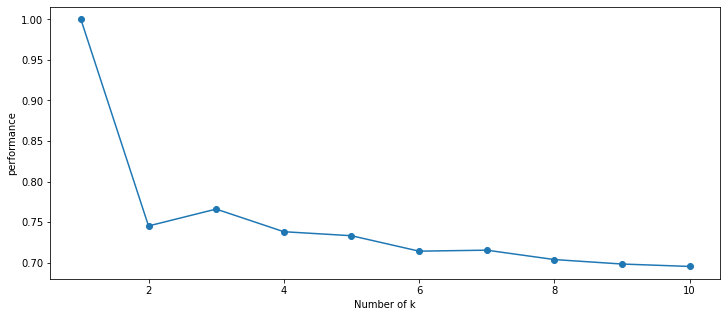

In [41]:
plt.figure(figsize=(12,5))
plt.plot(range(1,11), train_accuracy, marker='o')
plt.xlabel('Number of k')
plt.ylabel('performance')
plt.show()

In [43]:
model_knn1 = KNeighborsClassifier(n_neighbors=3)

#fitting the model
model_knn1.fit(x_train, y_train)

#checking the training score
print('Accuracy on training: ',model_knn1.score(x_train, y_train))

# predict the target on the train dataset
yhat1 = model_knn1.predict(x_train)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_train.values, yhat1, labels=[1,2,3,4])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(y_train.values, yhat1))

Accuracy on training:  0.766007093522494
-------The confusion matrix for this model is-------
[[2464  195   17    2]
 [ 662 1838  146   32]
 [ 360  429 1806   84]
 [ 103  227  250 2099]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           1       0.69      0.92      0.79      2678
           2       0.68      0.69      0.68      2678
           3       0.81      0.67      0.74      2679
           4       0.95      0.78      0.86      2679

    accuracy                           0.77     10714
   macro avg       0.78      0.77      0.77     10714
weighted avg       0.78      0.77      0.77     10714



In [83]:

params={'n_estimators':[100,50],'max_depth':[5,6,7,8],'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy'],'max_features':['sqrt','log2']}
rf=RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', n_jobs=-1, 
                    refit='boolean',error_score='raise',verbose=1,
                    )
print(grid)
grid_result = grid.fit(x_train, y_train)


GridSearchCV(error_score='raise', estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 50]},
             refit='boolean', scoring='accuracy', verbose=1)
Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [84]:
yhat=grid.predict(x_test)
cm1 = confusion_matrix(y_test.values, yhat, labels=[1,2,3,4])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(y_test.values, yhat))

-------The confusion matrix for this model is-------
[[585  81   3   1]
 [217 323 108  21]
 [ 89 144 404  33]
 [ 13  36 114 507]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           1       0.65      0.87      0.74       670
           2       0.55      0.48      0.52       669
           3       0.64      0.60      0.62       670
           4       0.90      0.76      0.82       670

    accuracy                           0.68      2679
   macro avg       0.69      0.68      0.68      2679
weighted avg       0.69      0.68      0.68      2679



In [81]:
params={'C':[0.25,0.75,1],'gamma':['scale','auto'],
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'verbose':[True]
        }
svm=SVC()
grid = GridSearchCV(estimator=svm, param_grid=params, scoring='accuracy', n_jobs=-1, 
                    refit='boolean',error_score='raise',verbose=1,
                    )
print(grid)
grid_result = grid.fit(x_train, y_train)

GridSearchCV(error_score='raise', estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.25, 0.75, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'verbose': [True]},
             refit='boolean', scoring='accuracy', verbose=1)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LibSVM]

In [82]:
yhat=grid.predict(x_test)
cm1 = confusion_matrix(y_test.values, yhat, labels=[1,2,3,4])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(y_test.values, yhat))

-------The confusion matrix for this model is-------
[[540 129   1   0]
 [156 370 129  14]
 [ 52 162 415  41]
 [  6  54 116 494]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           1       0.72      0.81      0.76       670
           2       0.52      0.55      0.53       669
           3       0.63      0.62      0.62       670
           4       0.90      0.74      0.81       670

    accuracy                           0.68      2679
   macro avg       0.69      0.68      0.68      2679
weighted avg       0.69      0.68      0.68      2679



In [48]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_train)
grid.fit(X, y)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 50]},
             refit='boolean', scoring='accuracy')

In [49]:
yhat=grid.predict(x_train)
cm1 = confusion_matrix(y_train.values, yhat, labels=[1,2,3,4])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(y_train.values, yhat))

-------The confusion matrix for this model is-------
[[2219  396   46   17]
 [ 803 1290  455  130]
 [ 331  417 1781  150]
 [  71  106  319 2183]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           1       0.65      0.83      0.73      2678
           2       0.58      0.48      0.53      2678
           3       0.68      0.66      0.67      2679
           4       0.88      0.81      0.85      2679

    accuracy                           0.70     10714
   macro avg       0.70      0.70      0.69     10714
weighted avg       0.70      0.70      0.69     10714

